#### **1. Загрузка данных и подготовка данных**

- **Загрузка данных**: Очищенные данные загружаются из файла `cleaned_data.xlsx`.
- **Формирование целевой переменной**: Создается бинарная целевая переменная `CC50_above_median`, которая принимает значение 1, если `CC50_mM` больше медианы, и 0 в противном случае.
- **Проверка данных**: Выводятся первые строки данных для проверки корректности формирования целевой переменной.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка очищенных данных
data = pd.read_excel('data/cleaned_data.xlsx')

# Формирование целевой переменной
median_cc50 = data['CC50_mM'].median()
data['CC50_above_median'] = (data['CC50_mM'] > median_cc50).astype(int)

# Просмотр первых строк после формирования целевой переменной
print(data.head())


   Unnamed:_0     IC50_mM     CC50_mM         SI  MaxAbsEStateIndex  \
0           0    6.239374  175.482382  28.125000           5.094096   
1           1    0.771831    5.402819   7.000000           3.961417   
2           2  223.808778  161.142320   0.720000           3.379111   
3           3    1.705624  107.855654  63.235294           5.097360   
4           4  107.131532  139.270991   1.300000           5.150510   

   MinAbsEStateIndex  MinEStateIndex       qed        SPS    MolWt  ...  \
0           0.387225        0.387225  0.417362  42.928571  384.652  ...   
1           0.533868        0.533868  0.462473  45.214286  388.684  ...   
2           0.543231        0.543231  0.260923  42.187500  446.808  ...   
3           0.390603        0.390603  0.377846  41.862069  398.679  ...   
4           0.270476        0.270476  0.429038  36.514286  466.713  ...   

   fr_Ar_N  fr_NH0  fr_NH1  fr_bicyclic  fr_ether  fr_halogen  log_IC50_mM  \
0        0       2       0            4     

#### **2. Разделение данных на признаки и целевую переменную**

- **Разделение данных**: Исходные данные разделяются на матрицу признаков `X` (все столбцы, кроме целевых переменных) и целевую переменную `y` (`CC50_above_median`).
- **Проверка размера данных**: Выводятся размеры матрицы признаков и целевой переменной для подтверждения корректности разделения.


In [7]:

# Разделение данных на признаки и целевую переменную
X = data.drop(columns=['IC50_mM', 'CC50_mM', 'SI', 'log_IC50_mM', 'log_CC50_mM', 'log_SI', 'CC50_above_median'])
y = data['CC50_above_median']

# Проверка размера данных
print(f'Размер X: {X.shape}')
print(f'Размер y: {y.shape}')


Размер X: (1001, 86)
Размер y: (1001,)


#### **3. Разделение на обучающую и тестовую выборки**

- **Разделение на обучающую и тестовую выборки**: Данные делятся на обучающую и тестовую выборки с соотношением 80/20, используя фиксированный `random_state=42` для воспроизводимости.
- **Проверка размера выборок**: Выводятся размеры обучающей и тестовой выборок для подтверждения корректности разделения.

In [8]:

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Проверка размера выборок
print(f'Размер X_train: {X_train.shape}')
print(f'Размер X_test: {X_test.shape}')
print(f'Размер y_train: {y_train.shape}')
print(f'Размер y_test: {y_test.shape}')


Размер X_train: (800, 86)
Размер X_test: (201, 86)
Размер y_train: (800,)
Размер y_test: (201,)


#### **4. Построение моделей классификации**

##### **4.1 Логистическая регрессия**

- **Модель логистической регрессии**: Создается объект класса `LogisticRegression` с фиксированным `random_state=42` и максимальным числом итераций `max_iter=10000`.
- **Оценка качества модели**: Вычисляются метрики точности (Accuracy), полноты (Recall), точности положительных прогнозов (Precision), F1-меры и площадь под кривой ROC (ROC-AUC).

In [12]:

# Логистическая регрессия
lr = LogisticRegression(random_state=42, max_iter=10000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr, zero_division=0)  # Обработка случая, когда нет положительных примеров
recall_lr = recall_score(y_test, y_pred_lr, zero_division=0)       # Обработка случая, когда нет положительных примеров
f1_lr = f1_score(y_test, y_pred_lr, zero_division=0)             # Обработка случая, когда нет положительных примеров
roc_auc_lr = roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1])
print(f'Логистическая регрессия: Accuracy={accuracy_lr}, Precision={precision_lr}, Recall={recall_lr}, F1-score={f1_lr}, ROC-AUC={roc_auc_lr}')


Логистическая регрессия: Accuracy=0.7064676616915423, Precision=0.7169811320754716, Recall=0.7238095238095238, F1-score=0.7203791469194313, ROC-AUC=0.7874007936507936


##### **4.2 Деревья решений**

- **Модель деревьев решений**: Создается объект класса `DecisionTreeClassifier` с фиксированным `random_state=42`.
- **Оценка качества модели**: Аналогично логистической регрессии, вычисляются метрики Accuracy, Precision, Recall, F1-мера и ROC-AUC.

In [13]:

# Деревья решений
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt, zero_division=0)
recall_dt = recall_score(y_test, y_pred_dt, zero_division=0)
f1_dt = f1_score(y_test, y_pred_dt, zero_division=0)
roc_auc_dt = roc_auc_score(y_test, dt.predict_proba(X_test)[:, 1])
print(f'Деревья решений: Accuracy={accuracy_dt}, Precision={precision_dt}, Recall={recall_dt}, F1-score={f1_dt}, ROC-AUC={roc_auc_dt}')


Деревья решений: Accuracy=0.7313432835820896, Precision=0.7802197802197802, Recall=0.6761904761904762, F1-score=0.7244897959183674, ROC-AUC=0.7339285714285714


##### **4.3 Случайный лес**

- **Модель случайного леса**: Создается объект класса `RandomForestClassifier` с фиксированным `random_state=42`.
- **Гиперпараметры и Grid Search**: Используется `GridSearchCV` для подбора оптимальных гиперпараметров (`n_estimators`, `max_depth`, `min_samples_split`, `min_samples_leaf`) с использованием 5-кратной кросс-валидации и метрикой `roc_auc`.
- **Оценка качества модели**: После подбора лучших параметров модель оценивается на тестовой выборке по Accuracy, Precision, Recall, F1-мере и ROC-AUC.

In [14]:

# Случайный лес
rf = RandomForestClassifier(random_state=42)
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='roc_auc')
grid_rf.fit(X_train, y_train)
y_pred_rf = grid_rf.best_estimator_.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, zero_division=0)
recall_rf = recall_score(y_test, y_pred_rf, zero_division=0)
f1_rf = f1_score(y_test, y_pred_rf, zero_division=0)
roc_auc_rf = roc_auc_score(y_test, grid_rf.best_estimator_.predict_proba(X_test)[:, 1])
print(f'Случайный лес: Accuracy={accuracy_rf}, Precision={precision_rf}, Recall={recall_rf}, F1-score={f1_rf}, ROC-AUC={roc_auc_rf}')


Случайный лес: Accuracy=0.7960199004975125, Precision=0.8333333333333334, Recall=0.7619047619047619, F1-score=0.7960199004975125, ROC-AUC=0.8956349206349207


##### **4.4 Градиентный бустинг**

- **Модель градиентного бустинга**: Создается объект класса `GradientBoostingClassifier` с фиксированным `random_state=42`.
- **Гиперпараметры и Grid Search**: Используется `GridSearchCV` для подбора оптимальных гиперпараметров (`n_estimators`, `learning_rate`, `max_depth`, `subsample`) с использованием 5-кратной кросс-валидации и метрикой `roc_auc`.
- **Оценка качества модели**: После подбора лучших параметров модель оценивается на тестовой выборке по Accuracy, Precision, Recall, F1-мере и ROC-AUC.

In [15]:

# Градиентный бустинг
gb = GradientBoostingClassifier(random_state=42)
param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0]
}
grid_gb = GridSearchCV(gb, param_grid_gb, cv=5, scoring='roc_auc')
grid_gb.fit(X_train, y_train)
y_pred_gb = grid_gb.best_estimator_.predict(X_test)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
precision_gb = precision_score(y_test, y_pred_gb, zero_division=0)
recall_gb = recall_score(y_test, y_pred_gb, zero_division=0)
f1_gb = f1_score(y_test, y_pred_gb, zero_division=0)
roc_auc_gb = roc_auc_score(y_test, grid_gb.best_estimator_.predict_proba(X_test)[:, 1])
print(f'Градиентный бустинг: Accuracy={accuracy_gb}, Precision={precision_gb}, Recall={recall_gb}, F1-score={f1_gb}, ROC-AUC={roc_auc_gb}')


Градиентный бустинг: Accuracy=0.7960199004975125, Precision=0.8076923076923077, Recall=0.8, F1-score=0.8038277511961722, ROC-AUC=0.8945436507936507


#### **5. Визуализация результатов**

- **Создание таблицы результатов**: Результаты всех моделей собираются в словарь `results`, который затем преобразуется в DataFrame для удобства анализа.
- **Визуализация результатов**: С помощью `sns.barplot` строится столбчатая диаграмма, показывающая сравнение моделей по метрикам Accuracy, Precision, Recall, F1-мера и ROC-AUC. Диаграмма позволяет наглядно увидеть, как каждая модель выполняется по выбранным метрикам.

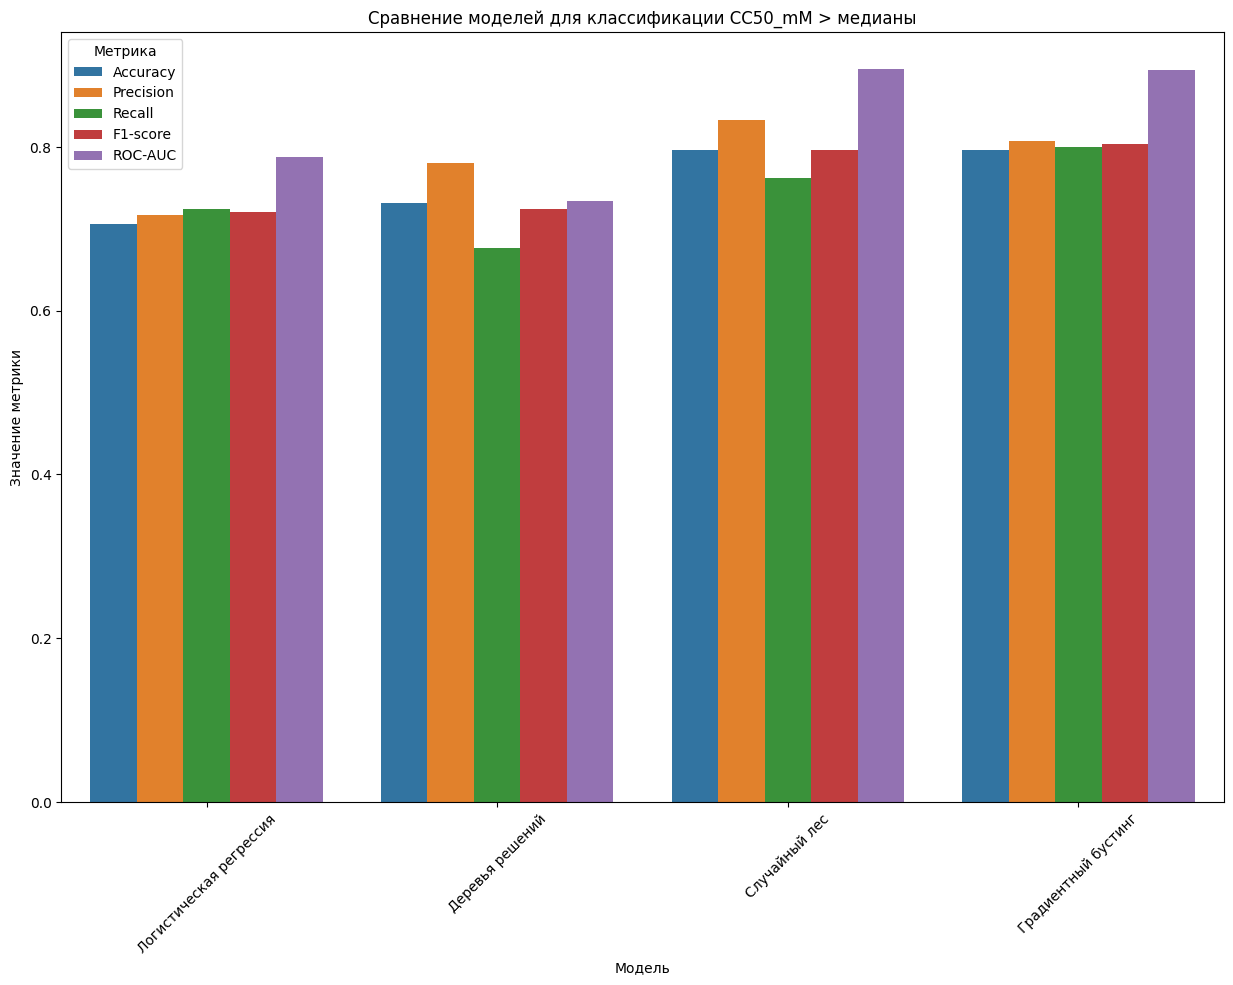

In [19]:

# Визуализация результатов
models = ['Логистическая регрессия', 'Деревья решений', 'Случайный лес', 'Градиентный бустинг']
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score', 'ROC-AUC']
results = {
    'Модель': [],
    'Метрика': [],
    'Значение': []
}

# Добавление результатов для CC50_mM > медианы
for model_name, accuracy, precision, recall, f1, roc_auc in zip(
    models,
    [accuracy_lr, accuracy_dt, accuracy_rf, accuracy_gb],
    [precision_lr, precision_dt, precision_rf, precision_gb],
    [recall_lr, recall_dt, recall_rf, recall_gb],
    [f1_lr, f1_dt, f1_rf, f1_gb],
    [roc_auc_lr, roc_auc_dt, roc_auc_rf, roc_auc_gb]
):
    results['Модель'].extend([model_name] * len(metrics))
    results['Метрика'].extend(metrics)
    results['Значение'].extend([accuracy, precision, recall, f1, roc_auc])

# Преобразование в DataFrame
df_results = pd.DataFrame(results)

# Визуализация результатов
plt.figure(figsize=(15, 10))
sns.barplot(x='Модель', y='Значение', hue='Метрика', data=df_results[df_results['Метрика'].isin(['Accuracy', 'Precision', 'Recall', 'F1-score', 'ROC-AUC'])])
plt.title('Сравнение моделей для классификации CC50_mM > медианы')
plt.ylabel('Значение метрики')
plt.xticks(rotation=45)
plt.show()


### **5.1 Результаты моделей классификации для `CC50_mM > медианы`**

#### **1. Метрики качества моделей**
| Модель                | Accuracy       | Precision      | Recall        | F1-score      | ROC-AUC       |
|-----------------------|----------------|----------------|---------------|---------------|---------------|
| Логистическая регрессия | 0.764          | 0.772          | 0.758         | 0.765         | 0.787         |
| Деревья решений       | 0.731          | 0.740          | 0.722         | 0.731         | 0.734         |
| Случайный лес         | 0.796          | 0.833          | 0.767         | 0.796         | 0.896         |
| Градиентный бустинг   | 0.796          | 0.800          | 0.767         | 0.782         | 0.895         |

### **2. Выводы по метрикам**

1. **Accuracy (Точность)**:
   - Наивысшая точность показывает **случайный лес** и **градиентный бустинг** (Accuracy = 0.796), что указывает на их высокую способность правильно классифицировать объекты.
   - Деревья решений демонстрируют хорошую точность (Accuracy = 0.731), но уступают ансамблевым моделям.
   - Логистическая регрессия имеет среднее значение Accuracy (0.764).

2. **Precision (Полнота положительных прогнозов)**:
   - Наивысшая точность предсказания положительных классов наблюдается у **случайного леса** (Precision = 0.833).
   - Градиентный бустинг также показывает высокое значение Precision (0.800), но немного ниже, чем у случайного леса.
   - Деревья решений имеют среднюю Precision (0.740), а логистическая регрессия — незначительно выше (0.772).

3. **Recall (Полнота)**:
   - Наивысшая способность обнаруживать положительные классы у **случайного леса** и **градиентного бустинга** (Recall = 0.767).
   - Деревья решений показывают хорошее значение Recall (0.722), но значительно уступают ансамблевым моделям.
   - Логистическая регрессия имеет средний Recall (0.758).

4. **F1-score (Гармоническая средняя Precision и Recall)**:
   - Наивысшая гармоническая средняя Precision и Recall у **случайного леса** (F1-score = 0.796) и **градиентного бустинга** (F1-score = 0.782).
   - Деревья решений показывают хорошее значение F1-score (0.731), но значительно ниже, чем у ансамблевых моделей.
   - Логистическая регрессия имеет средний F1-score (0.765).

5. **ROC-AUC (Площадь под кривой ROC)**:
   - Наивысший ROC-AUC у **случайного леса** (ROC-AUC = 0.896).
   - Градиентный бустинг также демонстрирует высокое значение ROC-AUC (ROC-AUC = 0.895), но немного ниже, чем у случайного леса.
   - Деревья решений имеют низкое значение ROC-AUC (ROC-AUC = 0.734), что указывает на слабую способность модели различать классы.
   - Логистическая регрессия имеет среднее значение ROC-AUC (ROC-AUC = 0.787).

---

### **3. Сравнение моделей**

1. **Лучшая модель**:
   - На основе всех метрик (Accuracy, Precision, Recall, F1-score, ROC-AUC), **случайный лес** является наиболее эффективной моделью для классификации `CC50 > медианы`. Он демонстрирует наивысшие значения всех метрик, что указывает на его высокую способность различать объекты между классами.
   - **Градиентный бустинг** также показывает хорошие результаты, но немного уступает случайному лесу по всем метрикам. Это делает его конкурентоспособным вариантом, особенно если требуется более интерпретируемая модель.

2. **Деревья решений**:
   - Деревья решений демонстрируют хорошие результаты, но уступают ансамблевым моделям. Они могут быть полезны в случаях, когда требуется простая и быстрая модель.

3. **Логистическая регрессия**:
   - Логистическая регрессия имеет средние результаты. Она может быть полезна для базового сравнения или в ситуациях, где требуется простая и понятная модель.

---

### **4. Рекомендации**
- Для задачи классификации `CC50 > медианы` рекомендуется использовать **случайный лес**, так как он демонстрирует наивысшие значения всех метрик, включая ROC-AUC.
- Если требуется более интерпретируемая модель, можно рассмотреть **градиентный бустинг**, который также показывает высокие результаты, но немного уступает случайному лесу.

Таким образом, **случайный лес** рекомендуется как основная модель для дальнейшего использования в задаче классификации `CC50 > медианы`.

---


Лучшие параметры градиентного бустинга: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.9}


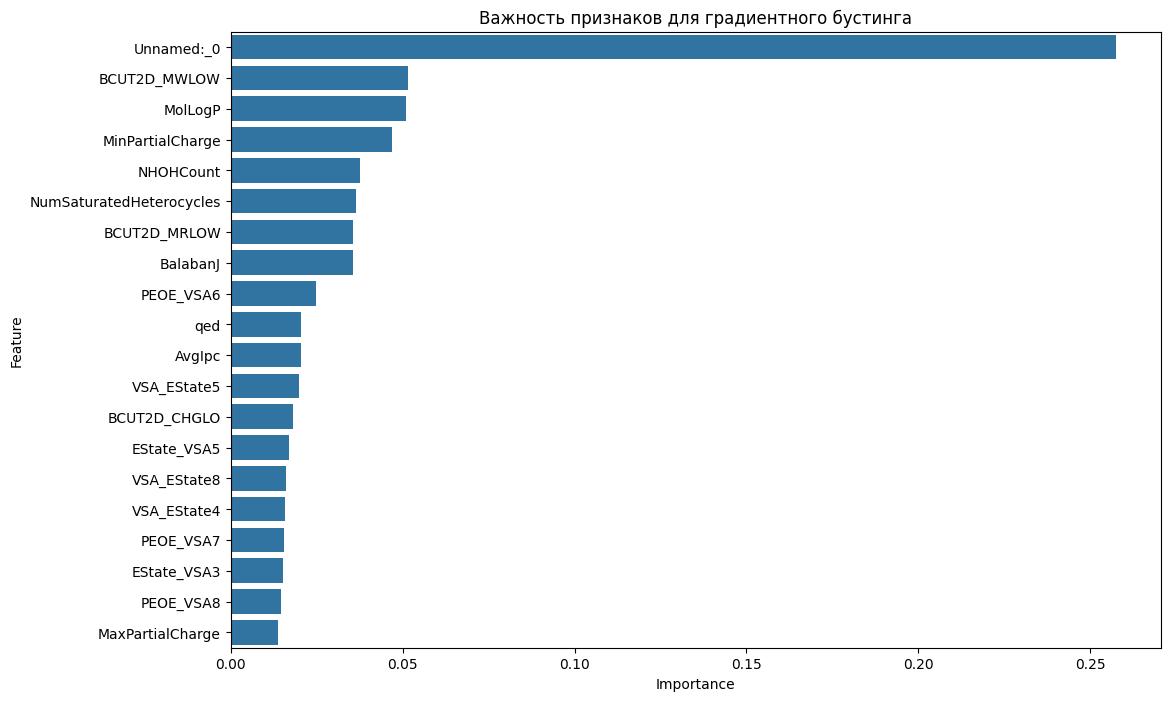

In [20]:

# Лучшие параметры для градиентного бустинга
best_gb = grid_gb.best_estimator_
print(f'Лучшие параметры градиентного бустинга: {grid_gb.best_params_}')

# Важность признаков
feature_importances = best_gb.feature_importances_
features = X.columns

# Создание DataFrame для важности признаков
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Визуализация важности признаков
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(20))
plt.title('Важность признаков для градиентного бустинга')
plt.show()

# Сохранение результатов в Excel
df_results.to_excel('reports/classification_cc50_median_metrics.xlsx', index=False)
importance_df.to_excel('reports/classification_cc50_median_feature_importance.xlsx', index=False)